# Image Manipulation in Python

In [1]:
# Let's see what Python version we are working with
import sys
print(sys.version)

3.5.2 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


Imports

In [2]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Data

In [4]:
# Use python Requests to read an image and convert to numpy array (the "currency of python images")
import requests
from io import BytesIO

url = 'https://images-na.ssl-images-amazon.com/images/I/61wkFih-xuL._SL1200_.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.asarray(img)

Read

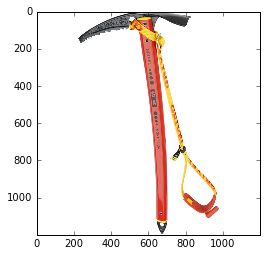

In [5]:
# Read with matplotlib and display image
plt.imshow(img)

In [6]:
# It should be width x height x number of channels
img.shape

(1200, 1200, 3)

Can do some numpy operations now.  But let's instead equalize the image or spread out the distribution to be even for all pixel intensity values also know as equalizing the image histogram.

Equalize

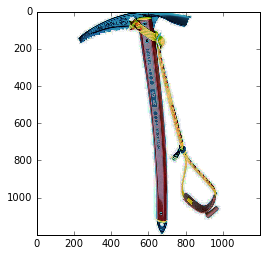

In [7]:
# Convert the numpy array to PIL package format to use it's function
img_pil = Image.fromarray(np.uint8(img))
img_pil = ImageOps.equalize(img_pil)
plt.imshow(img_pil)


# Could also crop, refit to a certain image size, flip and rotate (useful for image augmentation)

Convert back to `numpy`

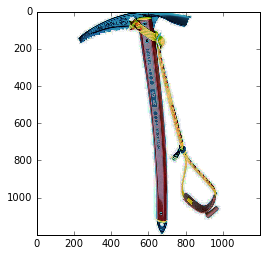

In [8]:
# Back to PIL equalized numpy array
img2 = np.asarray(img_pil)
plt.imshow(img2)

Histogram data exploration

(array([   8907.,   60151.,   69763.,   63010.,   77272.,   20689.,
          15704.,   24390.,   82367., 3897747.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

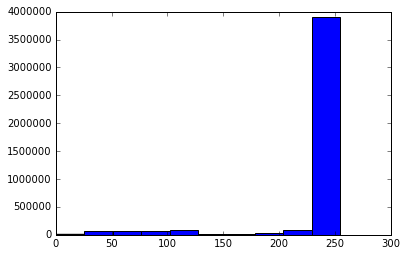

In [9]:
# Original image read from file as numpy (ravel flattens array)
plt.hist(img.ravel())

(array([  58262.,   57277.,   58178.,   59512.,   55282.,   58504.,
          56356.,   59877.,   66344., 3790408.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

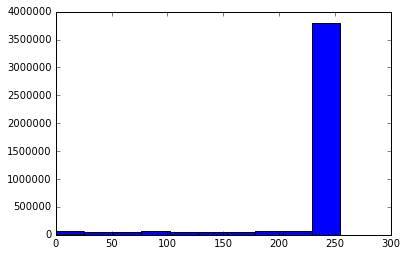

In [10]:
# A look at the equalized image
plt.hist(img2.ravel())

Save

In [11]:
# Save equalized as numpy binary file - it adds extension .npy 
# (it's fast i/o)
np.save('my_saved_img', img2)

In [12]:
# Look at my directory with an os command
! ls

61wkFih-xuL._SL1200_.jpg  MHarris_CV_2018.txt  p_arnot.jpg
MHarris_CV_2018.pdf	  my_saved_img.npy     p_arnot.npy
MHarris_CV_2018.ps	  Numpy_Image.ipynb    Untitled.ipynb


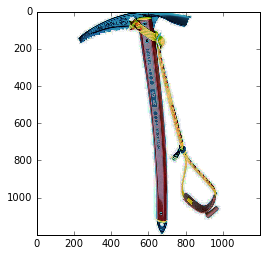

In [13]:
# Load equalized image back up for sanity check
img2 = np.load('my_saved_img.npy')
plt.imshow(img2)

In [14]:
# How many dimenions is this image array?
print(img2)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


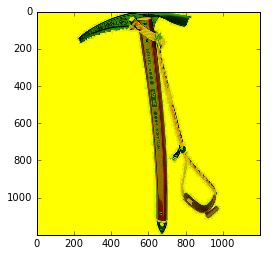

In [15]:
# A few more things in numpy

# Remove the Blue channel from equalized image, channel 1
imgmod = img2.copy()
imgmod[:,:,2] = 0
plt.imshow(imgmod)

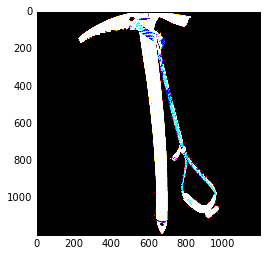

In [28]:
# Subtract the mean and divide by the std dev from all values
# using histogram equalized image
img2_norm = img2.copy()
meanval = np.mean(img2_norm.ravel())
stdval = np.std(img2_norm.ravel())
img2_norm = (img2_norm - meanval) / stdval
plt.imshow(np.uint8(img2_norm))

# Now try doing this per channel instead or over multiple images 
# (where you'd standardize per pixel accross images rather than 
# on all pixels of one image or within an image)

(array([3898302.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  421698.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

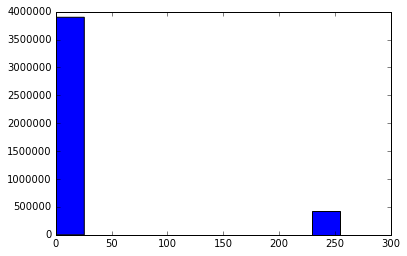

In [30]:
plt.hist(np.uint8(img2_norm.ravel(), bins=50))

In [31]:
print(img.shape)
print(min(img.ravel()))
print(max(img.ravel()))
print(np.mean(img.ravel()))

(1200, 1200, 3)
0
255
241.29946921296298


In [19]:
# Remove any values above a threshhold from original image
img_test = img.copy()
img_test[img[:] > 240] = 0

240

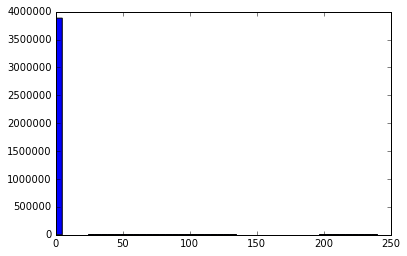

In [20]:
# Original image with removed values
plt.hist(img_test.ravel(), bins=50)
max(img_test.ravel())

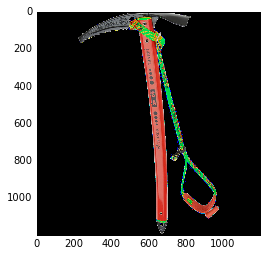

In [27]:
# Remember in matplotlib 0 apears black, 1 appears white and 255 appears black
# Original image with removed values visualized
plt.imshow(np.uint8(img_test))

In [22]:
# Download the image with os command "curl" - a common linux command for http requests
! curl -O 'https://images-na.ssl-images-amazon.com/images/I/61wkFih-xuL._SL1200_.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70930  100 70930    0     0   345k      0 --:--:-- --:--:-- --:--:--  346k


In [23]:
# Read with a different library called OpenCV
img_cv2 = cv2.imread('61wkFih-xuL._SL1200_.jpg')

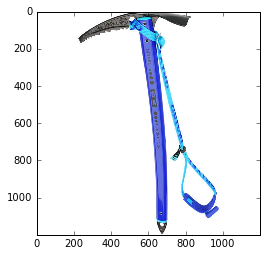

In [24]:
# This is no longer RGB - any guess as to the order of the color channels?
plt.imshow(img_cv2)

In [25]:
# Convert back to RGB
img_cv2_rgb = img_cv2[..., ::-1]

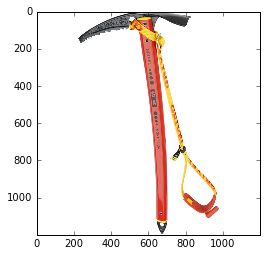

In [26]:
# Sanity check that it's RGB
plt.imshow(img_cv2_rgb)